In [1]:
import os

import numpy as np

import itk

import site
site.addsitedir("../ARGUS")

from ARGUS_Timing import *
from ARGUS_IO import *

from ARGUS_pnb_ar_inference import ARGUS_pnb_ar_inference
from ARGUS_pnb_roi_inference import ARGUS_pnb_roi_inference

In [2]:
pnb_ar = ARGUS_pnb_ar_inference(config_file_name="../ARGUS/ARGUS_pnb_ar.cfg", network_name="final", device_num=0)
pnb_roi = ARGUS_pnb_roi_inference()

monai.networks.nets.unet UNet.__init__:dimensions: Argument `dimensions` has been deprecated since version 0.6. Please use `spatial_dims` instead.


In [3]:
pnb_ar_best_models = [[0,0], [1,0], [2,0]]
pnb_ar.num_models = len(pnb_ar_best_models)

for i,r in enumerate(pnb_ar_best_models):
    model_name = os.path.join("Results", "pnb_vfold_run"+str(r[0]), "best_model_"+str(r[1])+".pth")
    pnb_ar.load_model(i, model_name)

In [4]:
#vid = ARGUS_load_video("Data_PNB/original/Negatives/46/2. 46_Video 2.mp4")
vid = ARGUS_load_video("Data_PNB/original/Positives/240/5. 240 AC_Video 3 (mislabeed as Pop).mp4")

In [5]:
print(vid.shape)

(359, 1080, 912)


In [6]:
pnb_ar.preprocess(vid)

[120, 119, 0]
[780, 1019, 359]


(12, 320, 320)
12


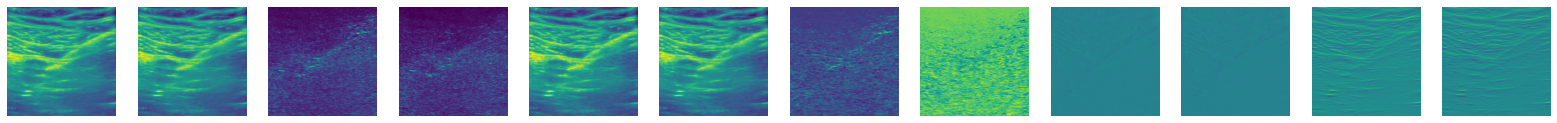

In [7]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

arr = pnb_ar.input_array
print(arr.shape)
num_channels = arr.shape[0]
print(num_channels)
plt.figure(figsize=[30, 30])
for c in range(num_channels):
    plt.subplot(
        2,
        num_channels + 1,
        (num_channels + 1) + c + 1,
    )
    plt.axis('off')
    plt.imshow(rotate(arr[c, :, :],270))
plt.show()

In [8]:
labels = pnb_ar.inference()

Iterations to optimize prior = 0
Iterations to optimize prior = 0
Iterations to optimize prior = 0
Iterations to optimize prior = 0


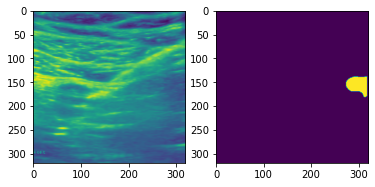

In [9]:
plt.subplot(1,2,1)
plt.imshow(rotate(arr[0],270))
plt.subplot(1,2,2)
plt.imshow(rotate(labels,270))

In [10]:
pnb_roi.inference(pnb_ar.input_image, labels)

(0, 0)